In [1]:
base_name = 'conflit'

Mounted at /content/drive/


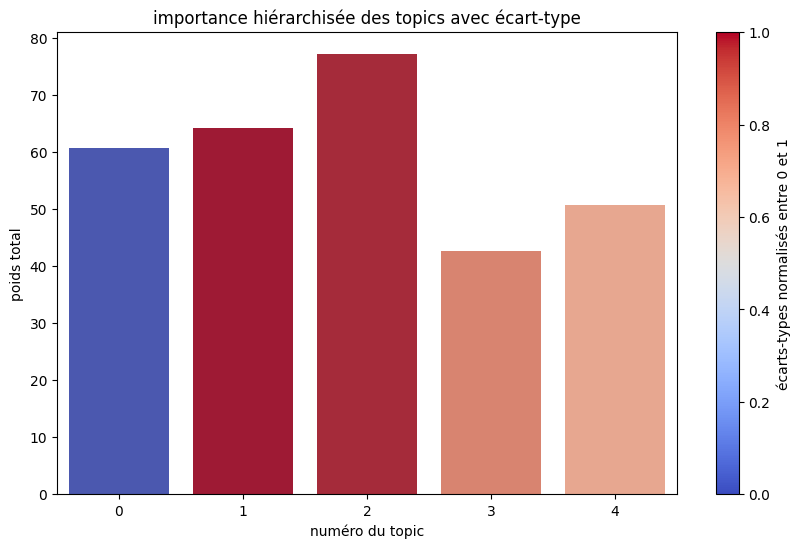

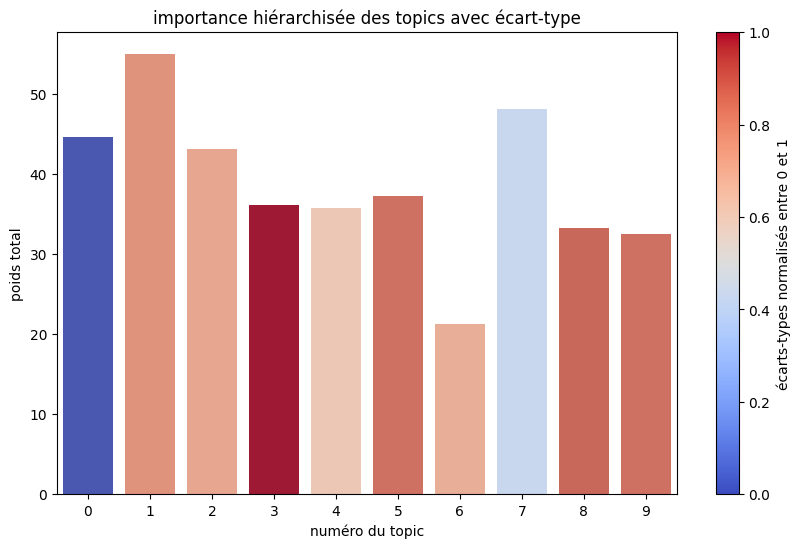

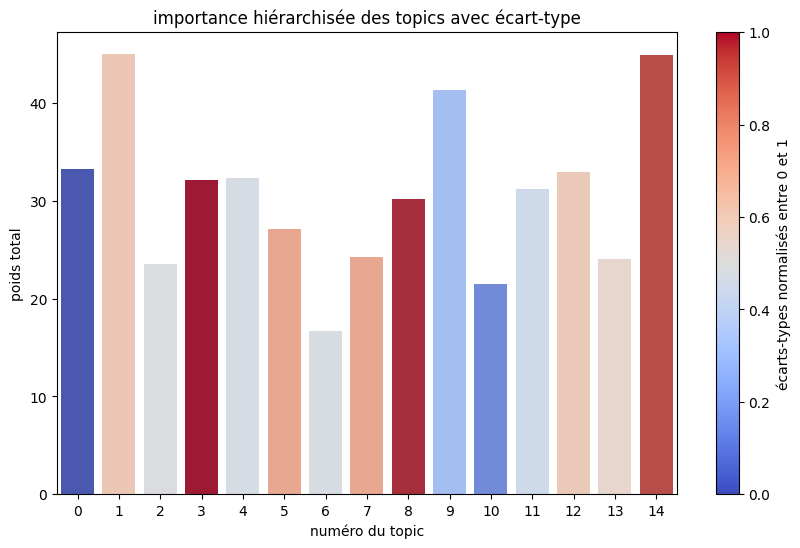

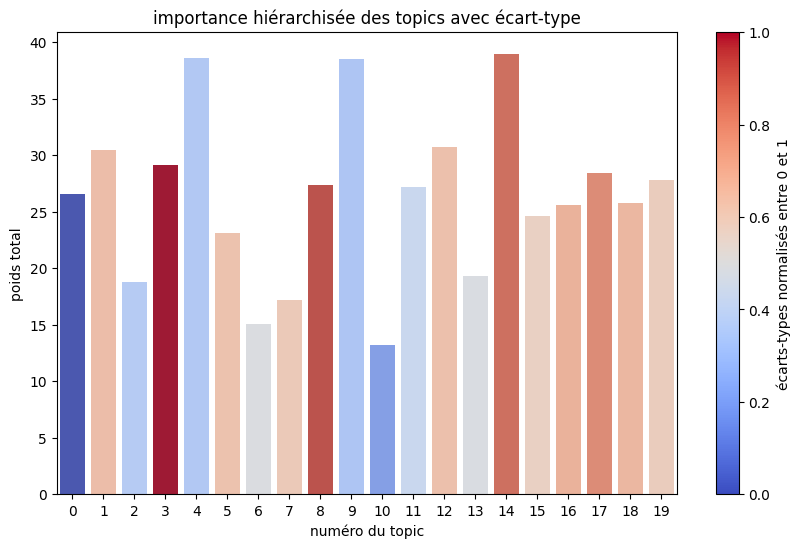

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import stdev
from google.colab import drive
import numpy as np
from matplotlib.cm import ScalarMappable

# Assurez-vous que 'base_name' est défini quelque part dans votre code

drive.mount('/content/drive/')
folder_path = '/content/drive/MyDrive/COLAB_NLP/'

for i in range(5, 21, 5):
    name_candidate = folder_path + 'RESULTS_' + base_name + '/' + base_name + '_info_' + str(i) + '.csv'

    df = pd.read_csv(name_candidate, sep=';')
    colonnes_topics = df.columns[6:]

    poids_topics = {}
    poids_listes = {}
    for col in range(0, len(colonnes_topics), 2):
        colonne_topic = colonnes_topics[col]
        colonne_poids = colonnes_topics[col + 1]
        for index, row in df.iterrows():
            topic = row[colonne_topic]
            poids = row[colonne_poids]
            if topic not in poids_topics:
                poids_topics[topic] = 0
                poids_listes[topic] = []
            poids_topics[topic] += poids
            poids_listes[topic].append(poids)

    data = {'Topic': [], 'Poids Total': [], 'Ecart-Type': []}
    for topic in poids_topics:
        data['Topic'].append(topic)
        data['Poids Total'].append(poids_topics[topic])
        ecart_type = stdev(poids_listes[topic]) if len(poids_listes[topic]) > 1 else 0
        data['Ecart-Type'].append(ecart_type)

    df = pd.DataFrame(data)

    # Faire de 'Topic' l'index du DataFrame
    df.set_index('Topic', inplace=True)

    df.sort_index(ascending=True, inplace=True)

    # Définir la colormap
    cmap = plt.cm.coolwarm

    # Normaliser les écarts-types pour obtenir des valeurs entre 0 et 1
    normed_std_devs = np.interp(df['Ecart-Type'], (df['Ecart-Type'].min(), df['Ecart-Type'].max()), (0, 1))

    # Convertir les écarts-types normalisés en couleurs
    colors = dict(zip(df.index, [cmap(v) for v in normed_std_devs]))

    # Créer le barplot
    fig, ax = plt.subplots(figsize=(10, 6))
    barplot = sns.barplot(
        x=df.index,
        y='Poids Total',
        data=df,
        palette=df.index.map(colors),
        dodge=False,
        ax=ax
    )

    sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(0, max(normed_std_devs)))
    sm.set_array([])

    # Ajouter la colorbar au graphique
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('écarts-types normalisés entre 0 et 1')

    # Personnaliser le graphique
    plt.title('importance hiérarchisée des topics avec écart-type')
    plt.xlabel('numéro du topic')
    plt.ylabel('poids total')
    plt.xticks(rotation=0)

    plt.show()